angle is 0.15137544373402623
angle is -0.21109333322274665
-0.6666666666666666


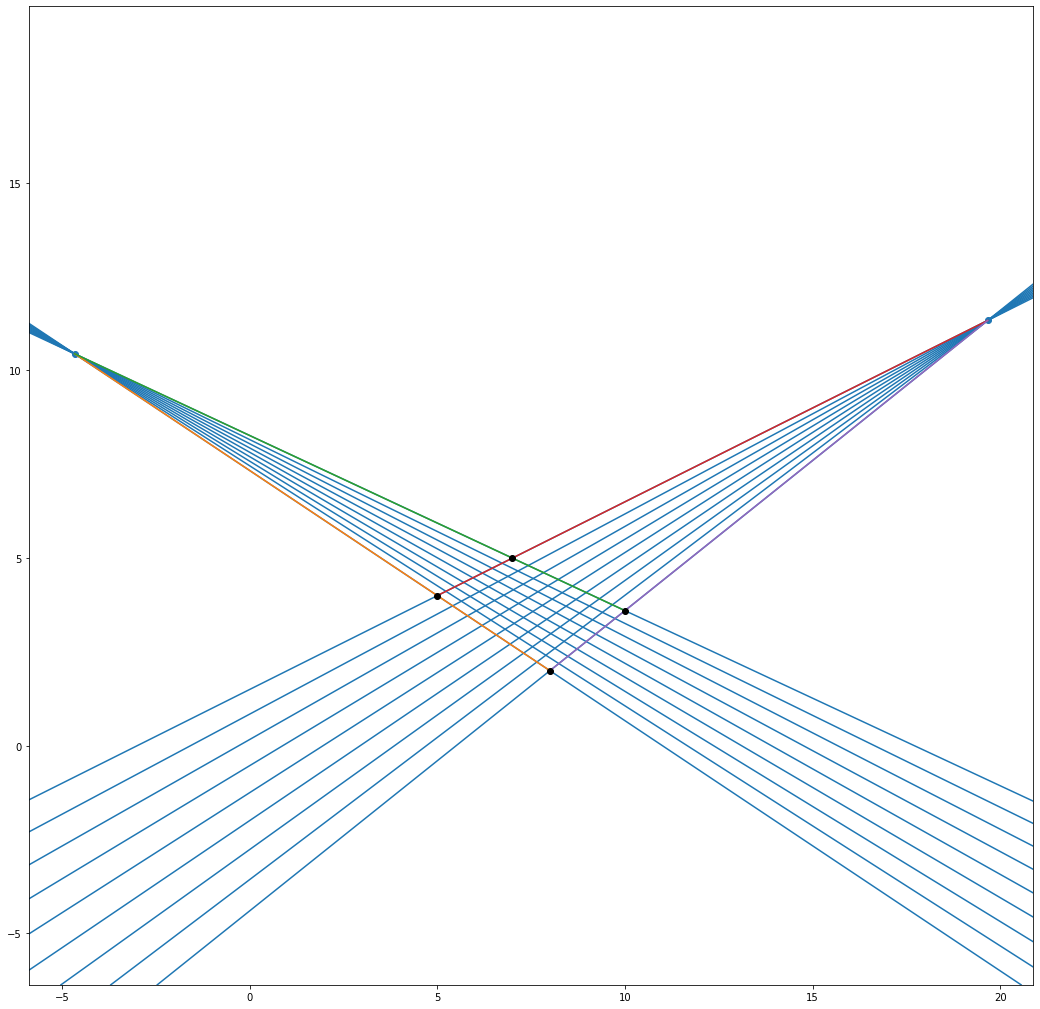

In [122]:
import matplotlib.pyplot as plt
# import numpy as np
import math


class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    
    
class Line:
  def __init__(self, p1, p2):
    self.p1 = p1
    self.p2 = p2
  def eq_a(self):
    return (self.p2.y-self.p1.y)/(self.p2.x-self.p1.x) 
  def eq_b(self):
    return (self.p1.y - self.p1.x * self.eq_a())
  def plot(self):
    plt.plot([self.p1.x,self.p2.x],[self.p1.y,self.p2.y])
    

# zice punctul unde se intalnesc doua linii
def punctDeFuga(line1, line2):
    x = (line2.eq_b() - line1.eq_b()) / ( line1.eq_a() - line2.eq_a() )
    y = line1.eq_a() * x + line1.eq_b()
    point = Point(x,y);
    return point;


    
# eq dreptei in functie de 2 puncte
# y-y0 = f'(x0)*(x-x0) 
def lineEq(p1, p2, x):
  y = ((p2.y-p1.y)/(p2.x-p1.x))*(x-p1.x)+p1.y
  return y


corners = [Point(5,4),Point(8,2),Point(10,3.6),Point(7,5)]
table_lines= [Line(corners[0],corners[1]),Line(corners[1],corners[2]),
              Line(corners[2],corners[3]), Line(corners[3],corners[0])]

plt.subplots(figsize=(18, 18))
# plt.xlim(-3,3)
# plt.ylim(-3,3)
# plt.set_aspect('equal', adjustable='box')

# axes.set_aspect(1./axes.get_data_ratio())
plt.axis('equal')




puncte_de_fuga = [punctDeFuga(table_lines[0],table_lines[2]), punctDeFuga(table_lines[1],table_lines[3])]
# plt.plot(puncte_de_fuga[0].x,)
plt.plot([puncte_de_fuga[0].x,puncte_de_fuga[1].x],[puncte_de_fuga[0].y,puncte_de_fuga[1].y], 'o')



#ia 2 linii si returneaza unghiul dintre ele
def angleBetweenLines(line1,line2):
    angle = math.atan(line2.eq_a())-math.atan(line1.eq_a())
    print('angle is ' + str(angle))
    return angle

#ia doua linii si returneaza un array de 9 elemente cu pantele dreptelor care incap intre cele doua linii
# (2 din cele 9 linii sunt liniile cu care am inceput)
def divideAngle(line1,line2):
    small_angle = angleBetweenLines(line1,line2) / 8
    start_angle = math.atan(line1.eq_a())
    slopes = [math.tan(start_angle + i*small_angle) for i in range(9)]
    return slopes


# def findLine

# #coordonata punctului in care linia care vine de la punctul de fuga intersecteaza marginea tablei
# punctDeFuga()

pante = [divideAngle(table_lines[0], table_lines[2]), divideAngle(table_lines[1], table_lines[3])]

print(pante[0][0])
for i in range(9):
  plt.axline((puncte_de_fuga[0].x,puncte_de_fuga[0].y), slope=pante[0][i], color='C0', label='by slope')
  plt.axline((puncte_de_fuga[1].x,puncte_de_fuga[1].y), slope=pante[1][i], color='C0', label='by slope')

    
# lines = [ , ]


plt.plot([puncte_de_fuga[0].x,corners[1].x],[puncte_de_fuga[0].y,corners[1].y])
plt.plot([puncte_de_fuga[0].x,corners[2].x],[puncte_de_fuga[0].y,corners[2].y])
plt.plot([puncte_de_fuga[1].x,corners[0].x],[puncte_de_fuga[1].y,corners[0].y])
plt.plot([puncte_de_fuga[1].x,corners[1].x],[puncte_de_fuga[1].y,corners[1].y])

# for line in table_lines:
#     line.plot()
# text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
# plt.text(0.5, 0.5, '6 inches x 2 inches', **text_kwargs)
plt.plot(figsize=(18, 18))

# line1.plot()
# plot table corners
plt.plot([point.x for point in corners],[point.y for point in corners], 'o', color='black');
plt.show()